# Dimensionality Reduction

So far in the course we've been working with datasets that are small enough for our models to handle, and we've used domain knowledge and some other techniques to determine what variables should be included in our analyses. As datasets get bigger, as the number of variables grows, we'll need "heavier" techniques to determine what variables and what points should be included in our analyses.

In this lesson, we're going to explore dimensionality reduction, which is the process of reducing the number of random variables under consideration. It's a way of paring down a dataset to what's important.

### Goals

*   Understand the two main branches of dimensionality reduction: feature selection and feature extraction.
*   Implement two algorithms for reducing the dimensionality of a dataset: PCA and LDA.
*    See the impact that reducing the dimensionality of a dataset has on a model's performance, both graphically and from a performance perspective.


# U4 Lesson 7 Assignment 1

We're going to cover two topics in this lesson: data dimensionality reduction and data preprocessing. Dimensionality reduction aims to produce a compact low-dimensional "encoding" of a high-dimensional data set, while data preprocessing aims to simplify, reduce and clean data for subsequent training.

To motivate our discussion, we will examine the aptly named curse of dimensionality. Suppose our data consists of 1000 datapoints uniformly distributed in a unit cube, and that we wish to apply 10-Nearest-Neighbors on this dataset. In 2 dimensions (2 independent variables), on average we must go a distance of sqrt(10/1000)=.1 to find 10 points (i.e. capturing 1% of the volume of this cube). As we increase the number of independent variables, the average distance between points in a neighborhood “blows up”; with just 10 dimensions we must go a distance of (10/1000)^(1/10) = .954 to capture 10 points. In other words, our neighborhood already contains 95% of the total possible volume with just 10 datapoints, and it is no longer informative.

<img src="knn_curse.png">

In addition to the example above, here are some other situations in which we'd want to reduce the dimensionality of our data:

*    If the data contain redundancy (multiple features encode the same information)
*    To eliminate features that are redundant and extract those which are more central to the phenomenon we are trying to learn,
*    If the data contain irrelevant or noisy features that could negatively impact a learning algorithm's performance
*    To more effectively visualize relationships between features
*    To address computational resource constraints


In this lesson we're going to study two techniques for reducing the dimensionality of data in different ways:

* feature transform: determines the dependencies between features and finds a new set of feature vectors with lower dimensionality (because it captures multiple original feature vectors in one) while also preserving the characteristics of the original feature vectors.

* feature selection: determines the relevant features for a given learning problem. Instead of creating a new feature set through transformations, feature selection simply subsets the feature set based on some criteria of relevance.


Principal Component Analysis (PCA) is the most basic and most common feature transform used in feature extraction and dimensionality reduction. It is easy to train, and has additional functionalities like noise reduction.

PCA is an unsupervised learning process. For supervised learning, not only do we want to preserve the variances across features in the data, we also want to preserve the relationships between features and labels. Linear Discriminant Analysis (LDA) takes the labeling into account (essentially considering it as an additional feature vector).

*    Review the sklearn PCA example with Iris Dataset
http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html
*    Review the sklearn Comparison of LDA and PCA 2D Projection of Iris Dataset
http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html
*    Plot the Iris Dataset by two attributes that you found to cluster well in Lesson 2, and color by species.


<img src="iris.png" height="400 px" width="400 px">

In [98]:
import matplotlib.pyplot as plt
from numpy.random import random
import pandas as pd
from collections import Counter
from random import choice
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

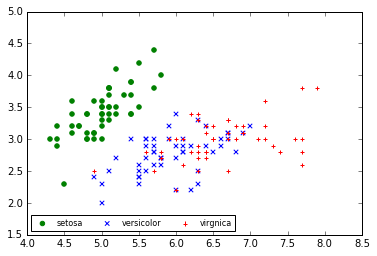

In [99]:
df = iris = pd.read_csv('../iris/iris_wiki.csv', header=0)

%matplotlib inline

colors = ['g', 'b', 'r']

seto = df[df['Species'] == 'setosa']
vers = df[df['Species'] == 'versicolor']
virg = df[df['Species'] == 'virginica']

setosa = plt.scatter(seto['Sepal length'], seto['Sepal width'], marker='o', color=colors[0])
versicolor  = plt.scatter(vers['Sepal length'], vers['Sepal width'], marker='x', color=colors[1])
virginica = plt.scatter(virg['Sepal length'], virg['Sepal width'], marker='+', color=colors[2])

plt.legend((setosa, versicolor, virginica),
           ('setosa', 'versicolor', 'virgnica'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)

plt.show()

# Unit 4 Lesson 7 Assignment 2: PCA

#### Estimate time 1 hour

For this assignment, we're going to perform PCA on the Iris Dataset we used earlier in this unit, and see how our k-means algorithm performs on the decomposed data compared to how it performs on the raw data. To gain a better understanding of PCA, refer to this great explanation.
http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html

### Perform PCA on the Iris Dataset.

In [100]:
%matplotlib inline

iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

In [101]:
X[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [102]:
X_r[:5]

array([[-2.68420713, -0.32660731],
       [-2.71539062,  0.16955685],
       [-2.88981954,  0.13734561],
       [-2.7464372 ,  0.31112432],
       [-2.72859298, -0.33392456]])

### Plot the PCA sample. How does it compare to the original plot?

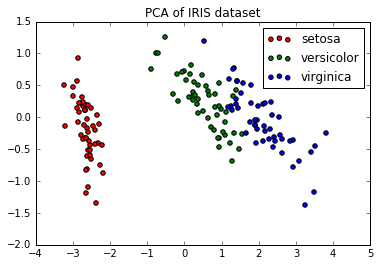

In [103]:
plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('PCA of IRIS dataset')

plt.show()

Frankly, I don't see that much difference. Setosa is still clearly different from versicolor and virginica, and the latter have some overlap. If anything, the delineation is a bit more explicit. 

### Retrain the k-nearest neighbors algorithm from Lesson 5 on the decomposed dataset.

In [104]:
%matplotlib inline

x, y = df.ix[choice(range(len(df)))][:2]

df_decomposed = pd.DataFrame(X_r)
distances = [((pair[0] - y)**2 + (pair[1] - x)**2)**(-1/2) for pair in zip(df_decomposed[0], df_decomposed[1])]
df_decomposed["distances"] = distances
df_decomposed["Species"] = df["Species"]

majority = list(Counter([pair[1] for pair in sorted(zip(df_decomposed.distances, df_decomposed.Species), 
                                                    key=lambda x: x[0])[:10]]))[0]
majority  

'setosa'

In [105]:
Counter(df["Species"])

Counter({'setosa': 50, 'versicolor': 50, 'virginica': 50})

### Compare the performance on the decomposed dataset to the performance on the raw dataset. Does anything stand out?

MZ: In the other KNN, the majority class was `virginica`. Now it is `setosa`, which also appear to be the most 'differentiated' class.

If you're looking for a challenge, try performing PCA on the smart phone dataset we used in the Random Forest lesson. Retrain your Random Forest on the decomposed dataset and compare its performance. Does anything stand out?

# Unit 4 Lesson 7 Project 3: LDA

#### Estimated time 1 hour

For this assignment, we're going to perform LDA on the Iris Dataset we used earlier in this unit, and see how our k-NN algorithm performs on the decomposed data compared to how it performs on the raw data. To gain a better understanding of LDA, refer to this explanation

### Perform LDA on the Iris Dataset.

In [111]:
%matplotlib inline

iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

### Plot the LDA sample. How does it compare to the original plot?

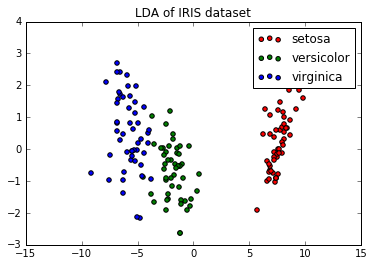

In [112]:
plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('LDA of IRIS dataset')

plt.show()

### Retrain the k-means algorithm from Lesson 4 on the decomposed dataset.

In [113]:
%matplotlib inline

x, y = df.ix[choice(range(len(df)))][:2]

df_decomposed = pd.DataFrame(X_r2)
distances = [((pair[0] - y)**2 + (pair[1] - x)**2)**(-1/2) for pair in zip(df_decomposed[0], df_decomposed[1])]
df_decomposed["distances"] = distances
df_decomposed["Species"] = df["Species"]

majority = list(Counter([pair[1] for pair in sorted(zip(df_decomposed.distances, df_decomposed.Species), 
                                                    key=lambda x: x[0])[:10]]))[0]
majority  

'virginica'

### Compare the performance on the decomposed dataset to the performance on the raw dataset. Does anything stand out? Did you get the same class prediction?

Yes, the same. But given that `setosa` seems much better segmented, I don't understand why. 

### Submission

Save the code you wrote in this lesson as "reduce.py" and submit via GitHub below.